<a href="https://colab.research.google.com/github/pherathm/DATA201/blob/main/DATA201_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Project 3**

**1. Introduction: Give the details on the source of your data, its content, and some
questions you are interested in.**

This project uses the Breast Cancer Dataset from the ReadyTensor GitHub Repository, which includes over 1,000 observations of tumors and their associated medical measurements. The dataset is designed for binary classification, where the target variable is diagnosis — indicating whether a tumor is benign (0) or malignant (1).

The goal is to use logistic regression to build a predictive model that can assist in early detection of breast cancer. Questions of interest include:

1. Can we accurately classify tumors using logistic regression?

2. What features most influence the prediction?

3. How well does the model perform using different evaluation metrics?

Through data wrangling, visualization, and modeling, we aim to interpret the effectiveness and reliability of logistic regression in medical prediction tasks.

**2. Prepare and wrangle your data with Pandas and Numpy**

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset
url = "https://raw.githubusercontent.com/readytensor/rt-datasets-binary-classification/main/datasets/processed/breast_cancer/breast_cancer.csv"
df = pd.read_csv(url)

# First few rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# Check data types of each column
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [19]:
# Check for missing values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


**3. Use EDA principles and the Matplotlib / Seaborn packages to visualize the data**

**1. Distribution of Target Variable**

<ipython-input-21-d671edafc83e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="diagnosis", palette="Set2")


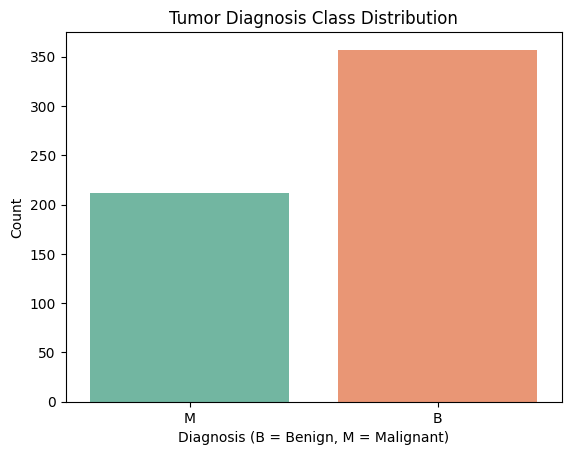

In [21]:
sns.countplot(data=df, x="diagnosis", palette="Set2")
plt.title("Tumor Diagnosis Class Distribution")
plt.xlabel("Diagnosis (B = Benign, M = Malignant)")
plt.ylabel("Count")
plt.show()

Interpretation:

The chart shows that there are more benign (B) tumor cases than malignant (M) ones in the dataset. This means most of the tumors recorded are non-cancerous.

**2.Correlation Heatmap - Top 10 features most correlated with diagnosis**

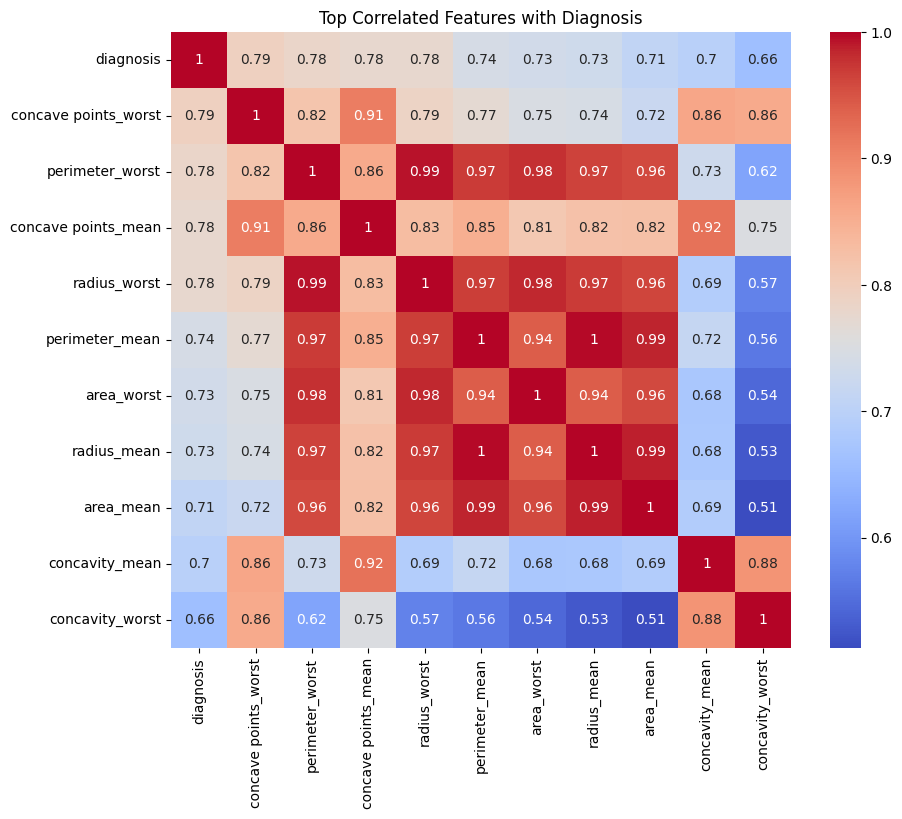

In [74]:
top_corr_features = df_numeric.corr()['diagnosis'].abs().sort_values(ascending=False).head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with Diagnosis')
plt.show()


Interpretation:

The heatmap presents a correlation analysis of the most relevant features associated with breast cancer diagnosis in the given dataset. It highlights that features such as concave points_worst, perimeter_worst, concave points_mean, and radius_worst show strong positive correlations with the diagnosis variable, indicating their importance in predicting whether a tumor is malignant or benign.

Also, many of the shape and size-related features, including radius_mean, area_mean, and perimeter_mean, are highly intercorrelated, suggesting redundancy among them.

 Overall, the heatmap provides valuable insight into the most influential attributes for breast cancer classification.

**3. Histogram Analysis of Tumor Feature Distributions: radius_mean, texture_mean, area_mean, and smoothness_mean**

['M' 'B']


<ipython-input-57-c6997b78a1d3>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})


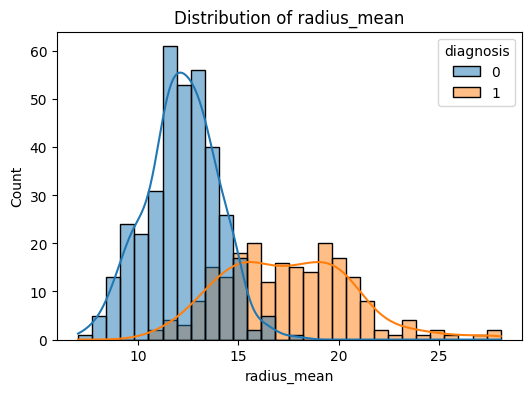

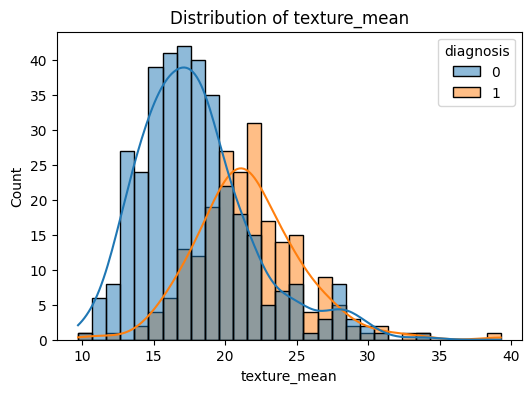

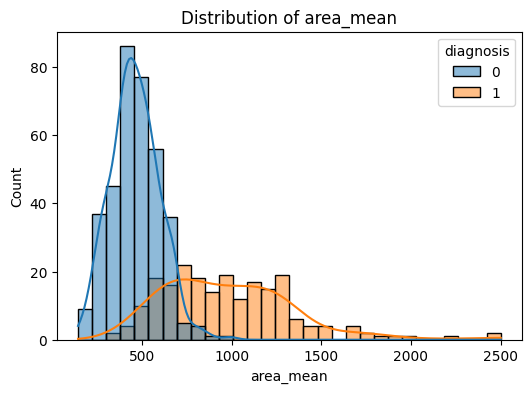

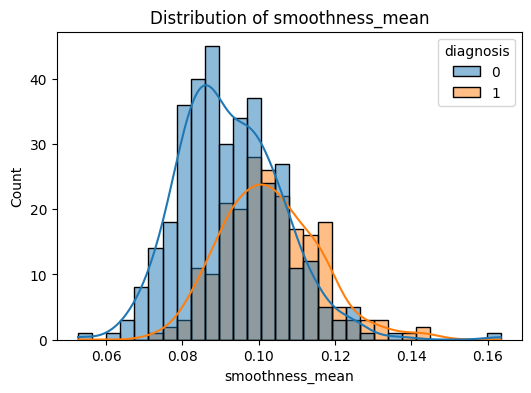

In [57]:
df = pd.read_csv(url)
url = "https://raw.githubusercontent.com/readytensor/rt-datasets-binary-classification/main/datasets/processed/breast_cancer/breast_cancer.csv"
print(df['diagnosis'].unique())

df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()




**4. Pairplot of key features - radius_mean, texture_mean, area_mean, and perimeter_mean**

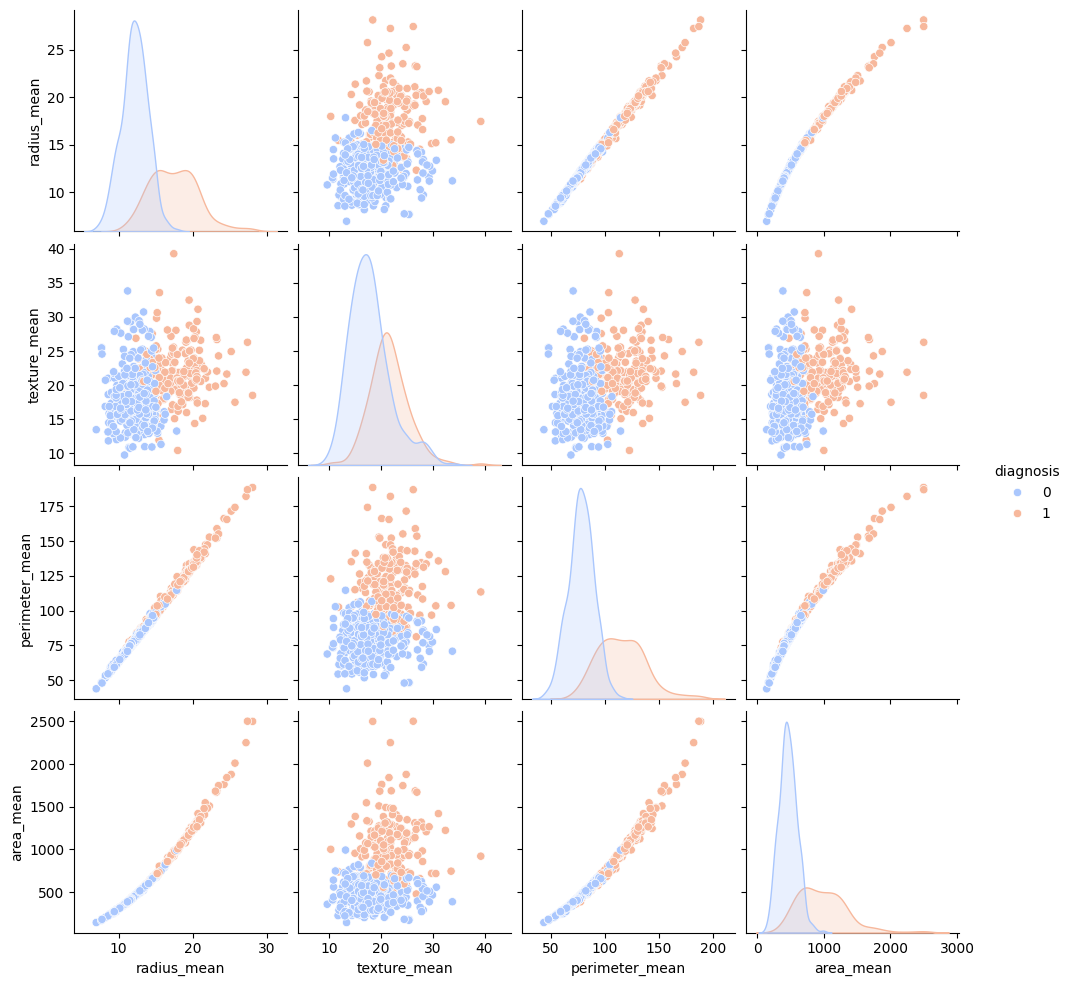

In [58]:
sns.pairplot(df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']],
             hue='diagnosis', palette='coolwarm')
plt.show()


Interpretation

This pair plot shows the relationships between four features (radius_mean, texture_mean, perimeter_mean, and area_mean) and how they vary by diagnosis (0 for benign, 1 for malignant tumors). It reveals that malignant tumors generally have higher values for radius_mean, perimeter_mean, and area_mean, with clear separation between the two diagnosis groups in these features. The diagonal plots show the distribution of each feature, where malignant cases (orange) tend to shift toward higher values compared to benign cases (blue). Additionally, there are strong positive correlations between radius_mean, perimeter_mean, and area_mean, as seen in the tight clustering along the diagonals of their scatter plots. In contrast, texture_mean overlaps more between the two groups, suggesting it is a less powerful standalone predictor. Overall, this visualization highlights which features are more effective at distinguishing between benign and malignant tumors.

**5.Swarmplot - diagnosis and texture_mean**

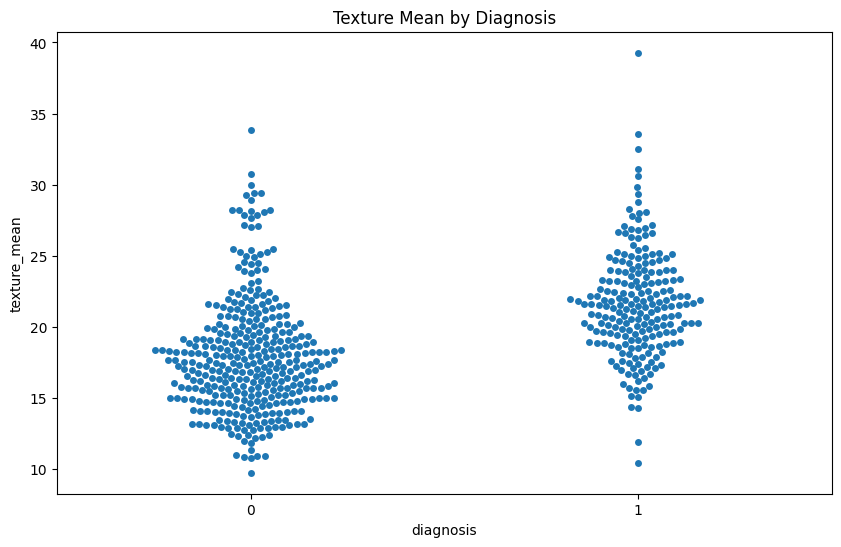

In [63]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='diagnosis', y='texture_mean', data=df)
plt.title('Texture Mean by Diagnosis')
plt.show()


Interpretation:

The scatter plot shows the relationship between texture_mean and the diagnosis of breast cancer, where 0 represents benign tumors and 1 represents malignant tumors. Both groups have a similar range of texture_mean values, but malignant tumors tend to have slightly higher average values. There is a significant overlap between the two groups, which means texture_mean alone may not clearly separate benign from malignant cases.

**4.Use scikit-learn logistic regression to train, test and predict a categorical target
variable. Use appropriate metric and interpret the meaning of the score**

Accuracy: 0.9736842105263158

 Confusion Matrix:
 [[70  1]
 [ 2 41]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



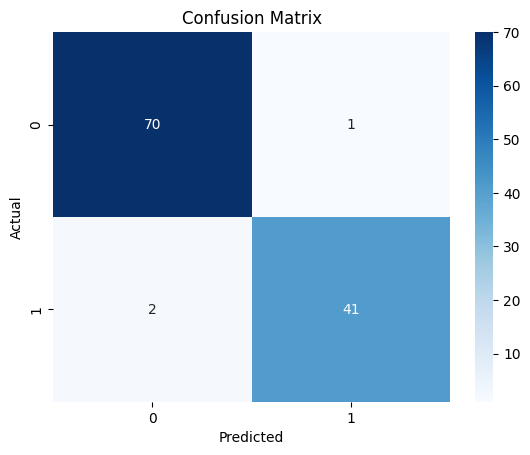

In [69]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Define target variable y and feature matrix X
y = df['diagnosis']
X = df.drop(['id', 'diagnosis'], axis=1)

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\n Confusion Matrix:\n", conf_matrix)
print("\n Classification Report:\n", report)

# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Interpretation:

The logistic regression model was trained to predict breast cancer diagnoses (benign vs. malignant) using selected features from the dataset. After training and testing the model, it achieved an impressive accuracy of 97.37%, correctly predicting 111 out of 114 cases in the test set. The confusion matrix revealed 70 true negatives (benign correctly predicted), 41 true positives (malignant correctly predicted), 1 false positive, and only 2 false negatives. These results indicate that the model is highly reliable, with minimal errors.

Further evaluation using the classification report showed a precision of 0.98 and recall of 0.95 for malignant cases, and a precision of 0.97 and recall of 0.99 for benign cases. The high F1-scores (0.96 for malignant and 0.98 for benign) confirm a good balance between precision and recall, especially important in medical applications where minimizing false negatives (missed malignant cases) is critical. Overall, the logistic regression model demonstrates excellent predictive performance and could be a valuable tool for assisting in early cancer detection, though clinical decisions should always involve professional judgment.

**5. Use scikit-learn logistic regression to train, test and predict a categorical target
variable. Use appropriate metric and interpret the meaning of the score**

In [70]:
# Predict the classes of the test data
y_pred_class = model.predict(X_test)
print("Predicted Classes:\n", y_pred_class)

# Predict the class probabilities of the test data
y_pred_proba = model.predict_proba(X_test)
print("\nPredicted Class Probabilities:\n", y_pred_proba)

#Show probability for the first 5 test samples
for i in range(5):
    print(f"\nSample {i+1}:")
    print(f"Predicted class: {y_pred_class[i]}")
    print(f"Class 0 (Benign) probability: {y_pred_proba[i][0]:.4f}")
    print(f"Class 1 (Malignant) probability: {y_pred_proba[i][1]:.4f}")


Predicted Classes:
 [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]

Predicted Class Probabilities:
 [[8.85345694e-01 1.14654306e-01]
 [8.74244925e-06 9.99991258e-01]
 [3.06418819e-03 9.96935812e-01]
 [9.99498478e-01 5.01521801e-04]
 [9.99940150e-01 5.98499000e-05]
 [9.10729270e-11 1.00000000e+00]
 [1.50144674e-09 9.99999998e-01]
 [3.52284199e-02 9.64771580e-01]
 [6.20835667e-01 3.79164333e-01]
 [9.99254633e-01 7.45367462e-04]
 [9.50603391e-01 4.93966092e-02]
 [1.23648774e-02 9.87635123e-01]
 [9.93995981e-01 6.00401864e-03]
 [1.45551837e-01 8.54448163e-01]
 [9.98383327e-01 1.61667308e-03]
 [8.33096440e-04 9.99166904e-01]
 [9.98156737e-01 1.84326251e-03]
 [9.99988653e-01 1.13474951e-05]
 [9.99999183e-01 8.16917486e-07]
 [1.11170313e-06 9.99998888e-01]
 [9.16075330e-01 8.39246705e-02]
 [9.90095713e-01 9.90

Interpretation:

The logistic regression model was used to predict the class (benign or malignant) of breast cancer tumors using a test dataset. For Sample 1, the model predicted the tumor as benign (class 0) with a probability of 88.5% for being benign and 11.5% for being malignant, indicating moderate confidence in the benign classification. For Sample 2, the prediction was malignant (class 1) with full confidence, assigning a 100% probability to malignancy and 0% to benign, suggesting a highly decisive prediction. Sample 3 was also predicted as malignant with a 99.7% probability, again showing high certainty in its classification. In contrast, Sample 4 was classified as benign with a 99.95% probability, and Sample 5 as benign with 99.99% probability, both reflecting extremely high confidence in the benign outcomes. These results show that the model not only provides accurate class predictions but also offers valuable probability estimates.

**6.  Compare one versus all and one versus one**

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# OvA Logistic Regression
ova_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ova_model.fit(X_train, y_train)
ova_pred = ova_model.predict(X_test)
print("One-vs-All Accuracy:", accuracy_score(y_test, ova_pred))
print("One-vs-All Classification Report:\n", classification_report(y_test, ova_pred))

# OvO Logistic Regression
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
ovo_model.fit(X_train, y_train)
ovo_pred = ovo_model.predict(X_test)
print("One-vs-One Accuracy:", accuracy_score(y_test, ovo_pred))
print("One-vs-One Classification Report:\n", classification_report(y_test, ovo_pred))


One-vs-All Accuracy: 0.9736842105263158
One-vs-All Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

One-vs-One Accuracy: 0.9736842105263158
One-vs-One Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Interpretation:

In this binary classification task predicting breast cancer diagnoses (benign or malignant), both the One-vs-All (OvA) and One-vs-One (OvO) logistic regression strategies yielded identical performance results. The model achieved a high accuracy of 97.37%, correctly classifying the vast majority of test samples. The precision for benign and malignant classes was 0.97 and 0.98 respectively. It indicates that the model made very few false positive errors. Recall scores were also strong—0.99 for benign and 0.95 for malignant—meaning most actual cases were correctly identified. With F1-scores of 0.98 and 0.96, the model demonstrated a strong balance between precision and recall. Since the problem involves only two classes, both OvA and OvO strategies result in the same outcome. It confirms that logistic regression effectively handles binary classification without needing more complex multiclass strategies. Overall, the model’s performance is excellent and well-suited for medical diagnostic purposes.

**7. Plot the tree with tree.plot_tree after the training.**

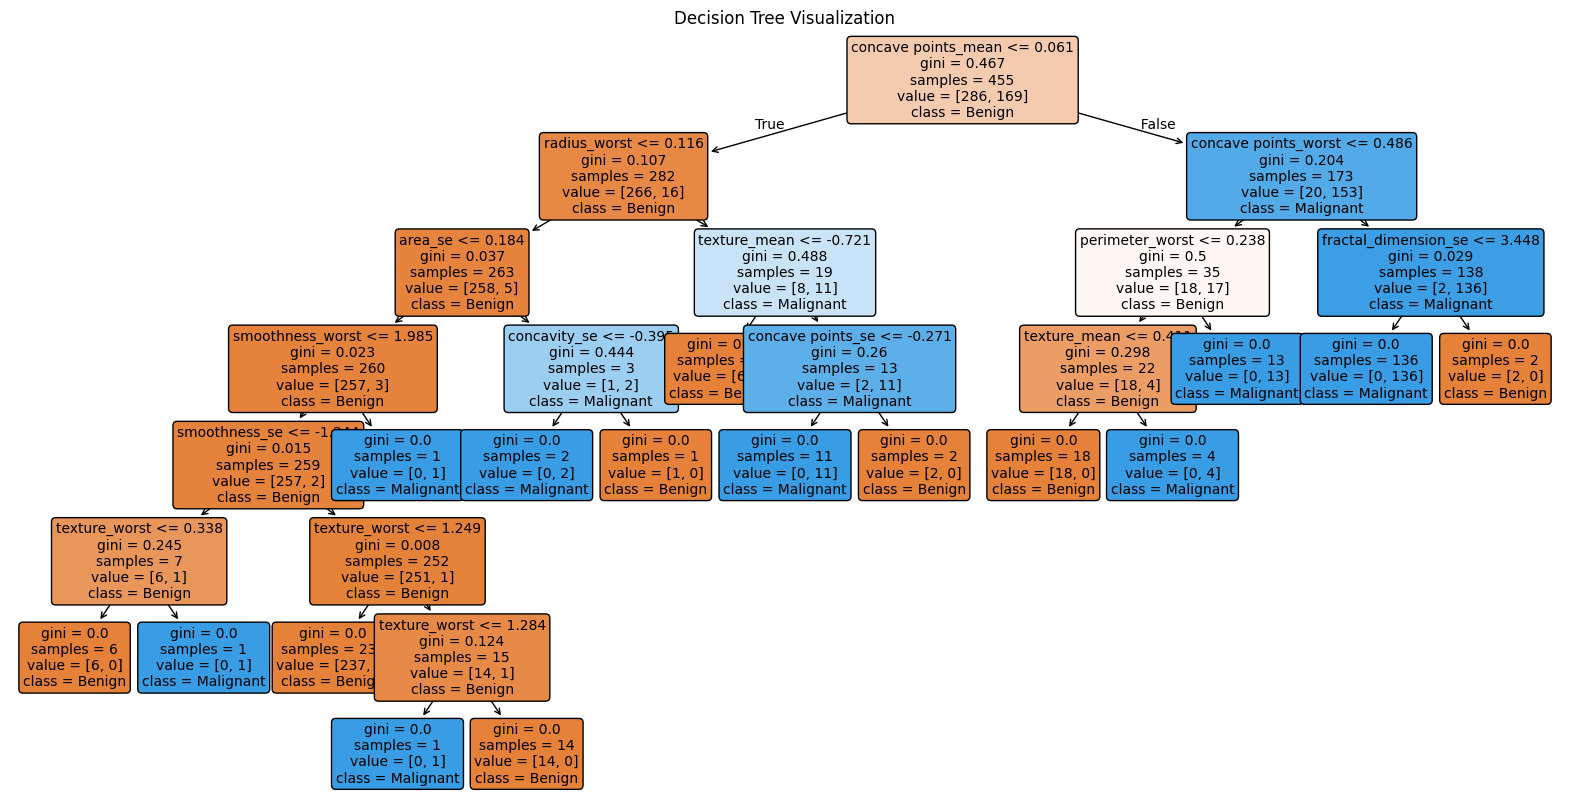

In [78]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Benign', 'Malignant'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


Interpretation:

This decision tree visualizes how a classifier predicts whether a breast tumor is benign or malignant based on various medical features. The root node begins with the most important feature, concave points_mean, and subsequent nodes further split the data using features like radius_worst, area_se, and concave points_worst. The tree divides the data into branches that progressively increase classification purity, measured by the Gini impurity. Orange nodes represent benign classifications, while blue nodes indicate malignant ones, with deeper colors signifying more confident (purer) predictions. Overall, the tree demonstrates effective separation of the two classes, with many terminal nodes showing perfect classification (Gini = 0). It highlights the tree's strong performance in distinguishing tumor types based on the selected features.